<a href="https://colab.research.google.com/github/arinjain373/Omnify-Marketing-Campaigns-Data-Analysis/blob/main/Ominfy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
ls_df = pd.read_csv("Listing Site Data.csv")
ga_df = pd.read_csv("Google ads data.csv")

# **DATA PREPARATION**

In [ ]:
ls_df.head()

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
0,Omnify,Coaching,20-Oct-20,13.0,1.0,NaN,2.0,Capterra,UNITED STATES,NaN,NaN,NaN
1,Omnify,Dance Studio,20-Oct-20,20.0,1.0,NaN,2.0,Capterra,UNITED KINGDOM,NaN,NaN,NaN
2,Omnify,Personal Trainer,20-Oct-20,6.0,1.0,NaN,2.0,Capterra,SINGAPORE,NaN,NaN,NaN
3,Omnify,Scheduling,20-Oct-20,59.0,1.0,NaN,2.0,GetApp,UNITED STATES,NaN,NaN,NaN
4,Omnify,Class Registration,21-Oct-20,6.0,1.0,NaN,2.0,Capterra,AUSTRALIA,NaN,NaN,NaN


In [ ]:
ga_df.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,03-Feb-21,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaN,USA
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",13-Mar-21,USA
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaN,USA
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaN,USA


In [ ]:
ga_df.rename(columns = {'Week':'Date'}, inplace = True)

In [ ]:
ga_df['Date'] = pd.to_datetime(ga_df['Date'], format='%d-%b-%y')
ga_df['Payment Date'] = pd.to_datetime(ga_df['Payment Date'], format='%d-%b-%y')

In [ ]:
ga_df['Payment ($)'] = pd.to_numeric(ga_df['Payment ($)'].str.replace(r'[\$,]', '', regex=True))

In [ ]:
ga_df.head()

,Date,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [ ]:
ga_df.tail()

,Date,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.0,0,0,NaN,NaT,USA
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.0,0,0,NaN,NaT,USA
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.0,0,0,NaN,NaT,USA
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.0,0,0,NaN,NaT,USA
417,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Management_Software_Exact,Exact,pilates studio management software,USD,0,3,0.0,0,0,NaN,NaT,USA


In [ ]:
ls_df['Date of Report'] = pd.to_datetime(ls_df['Date of Report'], infer_datetime_format=True)

In [ ]:
ls_df['Paid Date'] = pd.to_datetime(ls_df['Paid Date'], infer_datetime_format=True)

In [ ]:
ls_df['Paid'] = pd.to_numeric(ls_df['Paid'].str.replace(r'[\$,]', '', regex=True))

In [ ]:
ls_df.head()

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
0,Omnify,Coaching,2020-10-20,13.0,1.0,NaN,2.0,Capterra,UNITED STATES,NaN,NaN,NaT
1,Omnify,Dance Studio,2020-10-20,20.0,1.0,NaN,2.0,Capterra,UNITED KINGDOM,NaN,NaN,NaT
2,Omnify,Personal Trainer,2020-10-20,6.0,1.0,NaN,2.0,Capterra,SINGAPORE,NaN,NaN,NaT
3,Omnify,Scheduling,2020-10-20,59.0,1.0,NaN,2.0,GetApp,UNITED STATES,NaN,NaN,NaT
4,Omnify,Class Registration,2020-10-21,6.0,1.0,NaN,2.0,Capterra,AUSTRALIA,NaN,NaN,NaT


In [ ]:
ls_df.tail()

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
2086,Omnify,Class Registration,2021-04-30,10.00,1.0,NaN,10.75,Capterra,United States,NaN,NaN,NaT
2087,Omnify,Club Management,2021-04-30,1.00,1.0,NaN,12.25,Software Advice,United Kingdom,NaN,NaN,NaT
2088,Omnify,Coaching,2021-04-30,14.67,3.0,NaN,6.00,Capterra,United States,NaN,NaN,NaT
2089,Omnify,Dance Studio,2021-04-30,8.00,1.0,NaN,11.50,Capterra,United Kingdom,NaN,NaN,NaT
2090,Omnify,Fitness,2021-04-30,8.00,1.0,NaN,11.25,Capterra,Canada,NaN,NaN,NaT


# **Weekly and Monthly Report**

# *For Google Ads*

In [ ]:
ga_df['Week'] = ga_df['Date'].dt.strftime('%U')

# Calculate weekly and monthly metrics
ga_weekly_report = ga_df.groupby('Week').agg({
    'Cost ($)': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Payment ($)': 'sum',
})
ga_weekly_report['Returns'] = (ga_weekly_report['Payment ($)'] / ga_weekly_report['Cost ($)'])

In [ ]:
ga_weekly_report.shape

(15, 7)

In [ ]:
ga_weekly_report.head(15)

,Cost ($),Impressions,Clicks,Leads,Prospects,Payment ($),Returns
Week,,,,,,,
04,154.79,319,15,1,2,2168.0,14.006073
05,192.58,373,19,0,1,0.0,0.000000
06,216.13,364,21,0,1,980.0,4.534308
07,235.30,671,35,0,2,1788.0,7.598810
08,190.90,478,22,0,1,0.0,0.000000
09,141.40,407,14,0,1,980.0,6.930693
10,258.20,503,34,3,1,0.0,0.000000
11,184.36,468,22,1,0,0.0,0.000000
12,308.73,659,46,1,4,2388.0,7.734914


In [ ]:
scatter = px.scatter(ga_weekly_report, # data
                    x=ga_weekly_report['Cost ($)'],
                    y=ga_weekly_report['Impressions'],
                    title='Cost ($) VS Impressions on Weekly basis',
                    size=ga_weekly_report['Cost ($)'],
                    hover_name=ga_weekly_report.index,
                    color=ga_weekly_report['Impressions'],)

scatter.update_layout(xaxis_title="Cost ($)",
                      yaxis_title="Impressions",
                      yaxis=dict(type='log'))

scatter.show()

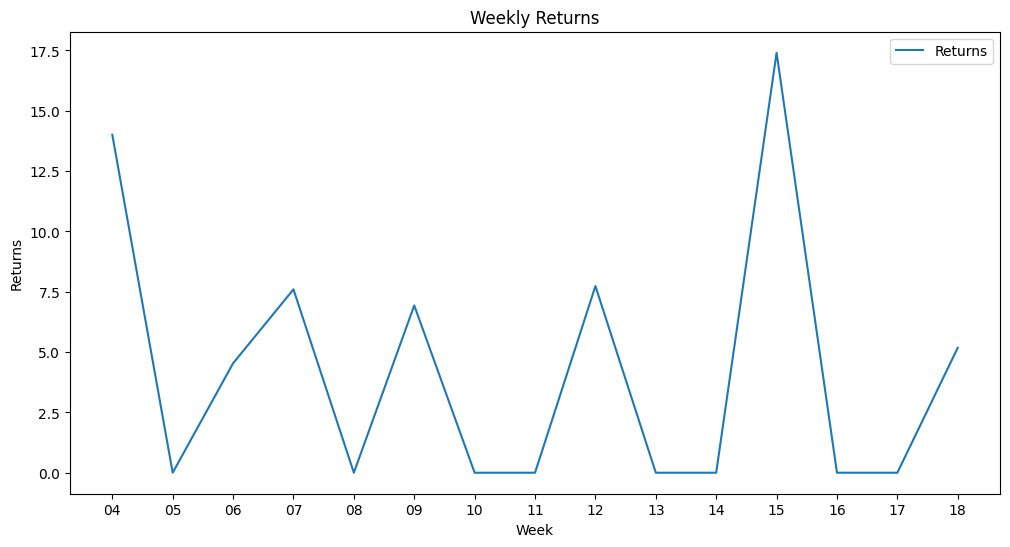

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ga_weekly_report.index, ga_weekly_report['Returns'], label='Returns')
# Add other metrics to the plot as well, e.g., total ad spends, impressions, etc.
plt.xlabel('Week')
plt.ylabel('Returns')
plt.title('Weekly Returns')
plt.legend()
plt.show()



In [ ]:
ga_df['Month'] = ga_df['Date'].dt.strftime('%Y-%m')
ga_monthly_report = ga_df.groupby('Month').agg({
    'Cost ($)': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Payment ($)': 'sum',
})
ga_monthly_report['Returns'] = (ga_monthly_report['Payment ($)'] / ga_monthly_report['Cost ($)'])

In [ ]:
ga_monthly_report.shape

(5, 7)

In [ ]:
ga_monthly_report.head(5)

,Cost ($),Impressions,Clicks,Leads,Prospects,Payment ($),Returns
Month,,,,,,,
2021-01,154.79,319,15,1,2,2168.0,14.006073
2021-02,834.91,1886,97,0,5,2768.0,3.315327
2021-03,1064.80,2623,155,5,6,3368.0,3.163035
2021-04,504.81,1600,89,5,5,2388.0,4.730493
2021-05,229.37,537,31,1,3,1188.0,5.179404


In [ ]:
scatter = px.scatter(ga_monthly_report, # data
                    x=ga_monthly_report['Cost ($)'],
                    y=ga_monthly_report['Impressions'],
                    title='Cost ($) VS Impressions on Monthly basis',
                    size=ga_monthly_report['Cost ($)'],
                    hover_name=ga_monthly_report.index,
                    color=ga_monthly_report['Impressions'],)

scatter.update_layout(xaxis_title="Cost ($)",
                      yaxis_title="Impressions",
                      yaxis=dict(type='log'))

scatter.show()

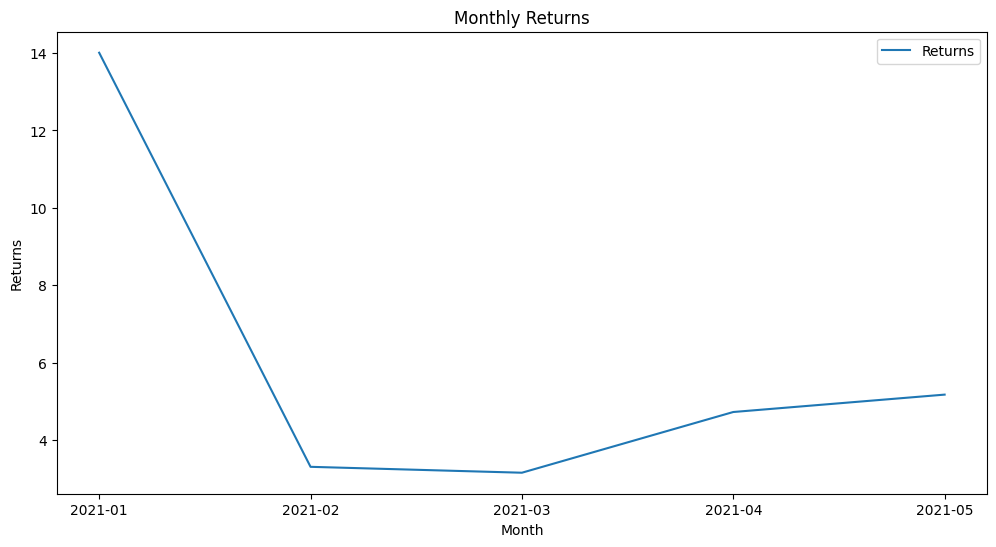

In [ ]:
# Time series for monthly data
plt.figure(figsize=(12, 6))
plt.plot(ga_monthly_report.index, ga_monthly_report['Returns'], label='Returns')
# Add other metrics to the plot as well, e.g., total ad spends, impressions, etc.
plt.xlabel('Month')
plt.ylabel('Returns')
plt.title('Monthly Returns')
plt.legend()
plt.show()

# *For Listing Site*

In [ ]:
ls_df['Returns'] = (ls_df['Paid'] / ls_df['Money Spent ($)'])

In [ ]:
# Create a new column for the week and month
ls_df['Week'] = ls_df['Date of Report'].dt.strftime('%Y-%U')


# Calculate weekly and monthly metrics
ls_weekly_report = ls_df.groupby('Week').agg({
    'Money Spent ($)': 'sum',
    'Paid': 'sum',
    'Clicks': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Returns': 'mean',
})
ls_weekly_report.rename(columns={'Money Spent ($)': 'Spends'}, inplace=True)

In [ ]:
ls_weekly_report.shape

(29, 6)

In [ ]:
ls_weekly_report.head(29)

,Spends,Paid,Clicks,Leads,Prospects,Returns
Week,,,,,,
2020-42,60.00,0.0,30.0,0.0,0.0,NaN
2020-43,351.50,0.0,104.0,0.0,0.0,NaN
2020-44,640.25,0.0,92.0,3.0,3.0,NaN
2020-45,2664.50,0.0,242.0,5.0,1.0,NaN
2020-46,403.00,0.0,108.0,2.0,0.0,NaN
2020-47,503.00,1794.0,77.0,1.0,1.0,448.500000
2020-48,707.25,0.0,90.0,4.0,0.0,NaN
2020-49,970.85,980.0,122.0,6.0,3.0,115.294118
2020-50,886.05,1788.0,113.0,4.0,3.0,183.384615


In [ ]:
scatter = px.scatter(ls_weekly_report, # data
                    x=ls_weekly_report['Spends'],
                    y=ls_weekly_report['Clicks'],
                    title='Spends($) VS Clicks on Weekly basis',
                    size=ls_weekly_report['Spends'],
                    hover_name=ls_weekly_report.index,
                    color=ls_weekly_report['Clicks'],)

scatter.update_layout(xaxis_title="Spends",
                      yaxis_title="Clicks",
                      yaxis=dict(type='log'))

scatter.show()

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=ls_weekly_report,
                x=ls_weekly_report.index,
                y=ls_weekly_report['Return'],
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

In [ ]:
ls_df['Month'] = ls_df['Date of Report'].dt.strftime('%Y-%m')
ls_monthly_report = ls_df.groupby('Month').agg({
    'Money Spent ($)': 'sum',
    'Clicks': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Returns': 'mean',
})
ls_monthly_report.rename(columns={'Money Spent ($)': 'Spends'}, inplace=True)

In [ ]:
ls_monthly_report.shape

(7, 5)

In [ ]:
ls_monthly_report.head(7)

,Spends,Clicks,Leads,Prospects,Returns
Month,,,,,
2020-10,411.50,134.0,0.0,0.0,NaN
2020-11,4445.25,548.0,12.0,5.0,448.500000
2020-12,4361.30,557.0,22.0,11.0,175.874131
2021-01,4707.25,661.0,36.0,12.0,NaN
2021-02,4523.65,657.0,42.0,11.0,741.190365
2021-03,3122.30,461.0,38.0,16.0,86.978959
2021-04,3652.00,459.0,36.0,13.0,59.689922


In [ ]:
scatter = px.scatter(ls_monthly_report, # data
                    x=ls_monthly_report['Spends'],
                    y=ls_monthly_report['Clicks'],
                    title='Spends VS Clicks on Monthly basis',
                    size=ls_monthly_report['Spends'],
                    hover_name=ls_monthly_report.index,
                    color=ls_monthly_report['Clicks'],)

scatter.update_layout(xaxis_title="Spends",
                      yaxis_title="Clicks",
                      yaxis=dict(type='log'))

scatter.show()

In [ ]:
bar = px.bar(x = ls_monthly_report.index,
             y = ls_monthly_report['Returns'],
             title='Months vs Returns',
             hover_name=ls_monthly_report.index,
             color=ls_monthly_report['Returns'],
            color_continuous_scale='agsunset')

bar.update_layout(xaxis_title='Months',
yaxis_title='Returns',
coloraxis_showscale=False)

bar.show()

# **Which channel is most Profitable?**

In [ ]:
channel_report = ls_df.groupby('Channel').agg({
    'Money Spent ($)': 'sum',
    'Paid': 'sum',
})
channel_report['Returns'] = (channel_report['Paid'] / channel_report['Money Spent ($)'])

most_profitable_channel = channel_report['Returns'].idxmax()

In [ ]:
channel_report.shape

(3, 3)

In [ ]:
channel_report.head()

,Money Spent ($),Paid,Returns
Channel,,,
Capterra,19461.85,19878.0,1.021383
GetApp,5449.90,1788.0,0.328079
Software Advice,311.50,1794.0,5.759230


In [ ]:
print(most_profitable_channel)

Software Advice


In [ ]:
org_bar = px.bar(x = channel_report['Returns'],
                 y = channel_report.index,
                 orientation='h',
                 color=channel_report['Returns'],
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Channels VS Returns')

org_bar.update_layout(xaxis_title='Return',
                      yaxis_title='Channels',
                      coloraxis_showscale=False)
org_bar.show()

# **Which category is most Profitable?**

In [ ]:
category_report = ls_df.groupby(['Categories']).agg({
    'Money Spent ($)': 'sum',
    'Paid': 'sum',
})
category_report['Returns'] = (category_report['Paid'] / category_report['Money Spent ($)'])

most_profitable_category = category_report['Returns'].idxmax()

In [ ]:
category_report.shape

(19, 3)

In [ ]:
category_report.head(19)

,Money Spent ($),Paid,Returns
Categories,,,
Camp Management,48.00,0.0,0.000000
Class Registration,2910.50,4303.0,1.478440
Club Management,245.50,0.0,0.000000
Coaching,1003.25,0.0,0.000000
Dance Studio,202.25,0.0,0.000000
Fitness,1238.50,1188.0,0.959225
Gymnastics,6.00,0.0,0.000000
Martial Arts,2.00,0.0,0.000000
Membership Management,4273.85,1788.0,0.418358


In [ ]:
print("Most Profitable Category is",most_profitable_category )

Most Profitable Category  Parks and Recreation


In [ ]:
bar = px.bar(x = category_report.index,
             y = category_report['Returns'],
             title='Categories vs Returns',
             hover_name=category_report.index,
             color=category_report['Returns'],
            color_continuous_scale='plasma')

bar.update_layout(xaxis_title='Categories',
yaxis_title='Returns',
coloraxis_showscale=False)

bar.show()


# **Which keyword is most Profitable?**

In [ ]:
keyword_report = ga_df.groupby(['Search Keyword']).agg({
    'Cost ($)': 'sum',
    'Payment ($)': 'sum',
})
keyword_report['Returns'] = (keyword_report['Payment ($)'] / keyword_report['Cost ($)'])

most_profitable_keyword = keyword_report['Returns'].idxmax()

In [ ]:
keyword_report.shape

(19, 3)

In [ ]:
keyword_report.head(29)

,Cost ($),Payment ($),Returns
Search Keyword,,,
booking management software,543.56,0.0,0.000000
pilates booking system,0.00,0.0,NaN
pilates management software,0.00,0.0,NaN
pilates studio booking software,100.88,0.0,0.000000
pilates studio management software,0.00,0.0,NaN
pilates studio software,39.16,0.0,0.000000
pilates studio software manager,0.00,0.0,NaN
pool booking app,74.12,0.0,0.000000
pool reservation software,365.38,3368.0,9.217801


In [ ]:
most_profitable_keyword

'reservation management system'

In [ ]:
org_bar = px.bar(x = keyword_report['Returns'],
                 y = keyword_report.index,
                 orientation='h',
                 color=keyword_report['Returns'],
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Keywords VS Returns')

org_bar.update_layout(xaxis_title='Return',
                      yaxis_title='Search Keyword',
                      coloraxis_showscale=False)
org_bar.show()

# **Which campaign is most Profitable?**

In [ ]:
campaign_report = ga_df.groupby('Campaign').agg({
    'Cost ($)': 'sum',
    'Payment ($)': 'sum',
})
campaign_report['Returns'] = (campaign_report['Payment ($)'] / campaign_report['Cost ($)'])

most_profitable_campaign = campaign_report['Returns'].idxmax()

In [ ]:
campaign_report.shape

(15, 3)

In [ ]:
campaign_report.head(15)

,Cost ($),Payment ($),Returns
Campaign,,,
EK_Generic_Quad-Tok_Pilates,100.88,0.0,0.000000
EK_Generic_Quad-Tok_Yoga,822.86,2168.0,2.634713
EK_Generic_Quad-Tok_Yoga_Singapore,6.38,0.0,0.000000
EK_Generic_Swimming,741.26,3368.0,4.543615
EK_Generic_Swimming_Canada,19.71,0.0,0.000000
EK_Generic_Swimming_Singapore,29.91,0.0,0.000000
EK_Generic_Swimming_UK,95.21,980.0,10.293036
EK_Generic_Tri-Tok_Pilates,39.16,0.0,0.000000
EK_Generic_Tri-Tok_Reservation,435.57,4176.0,9.587437


In [ ]:
print(most_profitable_campaign)

EK_Generic_Swimming_UK


In [ ]:
org_bar = px.bar(x = campaign_report['Returns'],
                 y = campaign_report.index,
                 orientation='h',
                 color=campaign_report['Returns'],
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Campaign VS Returns')

org_bar.update_layout(xaxis_title='Return',
                      yaxis_title='Campaign',
                      coloraxis_showscale=False)
org_bar.show()

# **Analyzing the impact of Geography**

In [ ]:
location_report = ls_df.groupby('Location').agg({
    'Money Spent ($)': 'sum',
    'Paid': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Leads':'sum'
})
location_report['Returns'] = (location_report['Paid'] / location_report['Money Spent ($)'])

In [ ]:
location_report.shape

(14, 6)

In [ ]:
location_report.head(14)

,Money Spent ($),Paid,Clicks,Prospects,Leads,Returns
Location,,,,,,
AUSTRALIA,1192.75,0.0,266.0,4.0,8.0,0.000000
Australia,31.50,0.0,13.0,0.0,0.0,0.000000
CANADA,1277.50,2768.0,235.0,4.0,9.0,2.166732
Canada,92.25,0.0,16.0,1.0,2.0,0.000000
Middle East,0.00,0.0,1.0,1.0,1.0,NaN
SINGAPORE,2100.75,1788.0,454.0,8.0,27.0,0.851125
Singapore,142.50,0.0,17.0,0.0,1.0,0.000000
UK,10.75,0.0,1.0,0.0,0.0,0.000000
UNITED KINGDOM,4177.85,4768.0,681.0,7.0,20.0,1.141257


In [ ]:
bar = px.bar(x = location_report.index,
             y = location_report['Clicks'],
             title='Locations vs Click',
             hover_name=location_report.index,
             color=location_report['Clicks'],
            color_continuous_scale='agsunset')

bar.update_layout(xaxis_title='Location',
yaxis_title='Clicks',
coloraxis_showscale=False)

bar.show()

In [ ]:
org_bar = px.bar(x = location_report['Returns'],
                 y = location_report.index,
                 orientation='h',
                 color=location_report['Returns'],
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Location VS Returns')

org_bar.update_layout(xaxis_title='Return',
                      yaxis_title='Location',
                      coloraxis_showscale=False)
org_bar.show()